## The Schrodinger Equation 

[Оригинал](http://jakevdp.github.io/blog/2012/09/05/quantum-python/)



Динамика одномерной квантовой системы определяется временным уравнение Шредингера:

$$
i\hbar\frac{\partial \psi}{\partial t}
  = \frac{-\hbar^2}{2m} \frac{\partial^2 \psi}{\partial x^2} + V \psi
$$


*Волновая функция* $ \psi $ является функцией как положения $ x $, так и времени $ t $, и это фундаментальное описание явлений квантового мира.

Представьте, что мы следим за движением некой частицы в одном измерении. Её волновая функция описывает вероятность измерения частицы в положении $ x $ в момент времени $ t $. 

## Метод Фурье с расщиплением шага ##

Стандартный способ численного решения некоторых дифференциальных уравнений - использование преобразования Фурье. Мы будем использовать обозначение для преобразования Фурье в следующей форме:

$$
\widetilde{\psi}(k, t) = \frac{1}{\sqrt{2\pi}}
  \int_{-\infty}^{\infty} \psi(x, t) e^{-ikx} dx
$$

В соответствии с этим соглашением соответствующее обратное преобразование Фурье определяется как:

$$
\psi(x, t) = \frac{1}{\sqrt{2\pi}}
  \int_{-\infty}^{\infty} \widetilde{\psi}(k, t) e^{ikx} dk
$$

Подстановка этого выражения в уравнение Шредингера после ряда упрощений переводит уравнения Шредингера в пространство частот (спектры функций):

$$
i\hbar\frac{\partial \widetilde{\psi}}{\partial t}
  = \frac{\hbar^2 k^2}{2m} \widetilde{\psi}
  + V(i\frac{\partial}{\partial k})\widetilde{\psi}
$$

Две версии уравнения Шредингера содержат интересную симметрию: шаг по времени в каждом случае зависит от простого умножения волновой функции $ \psi $, а также от более сложного члена с производными по $ x $ или $ k $. Ключевое наблюдение состоит в том, что, хотя уравнение трудно полностью оценить в одной из форм, каждый базис предлагает простой расчет одного из двух вкладов. Это предполагает эффективную стратегию численного решения уравнения Шредингера.Сначала мы решаем прямую часть уравнения Шредингера в $ x $ -пространстве:
   
$$
i\hbar\frac{\partial \psi}{\partial t}
  = V(x) \psi
$$

Для небольшого временного шага $ \Delta t $ оно имеет решение вида
   
$$
\psi(x, t + \Delta t) = \psi(x, t) e^{-i V(x) \Delta t / \hbar}
$$

Во-вторых, мы решаем прямую часть уравнения Шредингера в $ k $ -пространстве:
   
$$
i\hbar\frac{\partial \widetilde{\psi}}{\partial t}
  = \frac{\hbar^2 k^2}{2 m} \widetilde{\psi}
$$

Для небольшого временного шага $ \Delta t $ оно имеет решение вида

$$
\widetilde{\psi}(k, t + \Delta t)
    = \widetilde{\psi}(k, t) e^{-i \hbar k^2 \Delta t / 2m}
$$

## Численные соображения ##

Численное решение этой системы потребует многократных вычислений преобразования Фурье $ \psi (x, t) $ и обратного преобразования Фурье $ \widetilde {\psi} (k, t) $. Наиболее известным алгоритмом для вычисления числовых преобразований Фурье является быстрое преобразование Фурье (БПФ), которое [доступно в FFTW.jl](https://github.com/JuliaMath/FFTW.jl) и эффективно вычисляет следующую форму дискретного преобразования Фурье:

$$
  \widetilde{F_m} = \sum_{n=0}^{N-1} F_n e^{-2\pi i n m / N}
$$

и обратного тоже

$$
  F_n = \frac{1}{N} \sum_{m=0}^{N-1} \widetilde{F_m} e^{2\pi i n m / N}
$$

Нам нужно знать, как они связаны с непрерывными преобразованиями Фурье, определенными выше. Давайте возьмем пример прямого преобразования. Предположим, что бесконечный интеграл хорошо аппроксимируется конечным интегралом от $ a $ до $ b $, так что мы можем записать

$$
\widetilde{\psi}(k, t) = \frac{1}{\sqrt{2\pi}}
   \int_a^b \psi(x, t) e^{-ikx} dx
$$

Это приближение в конечном итоге эквивалентно предположению, что потенциал $ V(x) \to \infty $ при $ x \le a $ и $ x \ge b $. Теперь аппроксимируем этот интеграл суммой Римана в $ N $ слагаемых и определим $ \Delta x = (b - a) / N $ и $ x_n = a + n \Delta x $:

$$
\widetilde{\psi}(k, t) \simeq \frac{1}{\sqrt{2\pi}}
   \sum_{n=0}^{N-1} \psi(x_n, t) e^{-ikx_n} \Delta x
$$

Это начинает выглядеть как дискретное преобразование Фурье! Чтобы было похоже еще сильнее, давайте определим $ k_m = k_0 + m \Delta k $ с $ \Delta k = 2 \pi / (N \Delta x) $. Тогда наше приближение становится

$$
\widetilde{\psi}(k_m, t) \simeq \frac{1}{\sqrt{2\pi}}
   \sum_{n=0}^{N-1} \psi(x_n, t) e^{-ik_m x_n} \Delta x
$$

(Обратите внимание, что так же, как мы ограничили диапазон $ x $ выше, мы здесь также ограничили диапазон $ k $. Это означает, что высокочастотные компоненты сигнала будут потеряны в нашем приближении. Теорема выборки Найквиста говорит нам, что это неизбежное следствие выбора дискретных шагов в пространстве, и можно показать, что выбранное нами расстояние точно удовлетворяет пределу Найквиста, если мы выбираем $ k_0 = - \pi / \Delta x $).Подставляя наши выражения для $ x_n $ и $ k_m $ в приближение Фурье и выполнив некоторые телодвижения, мы находим следующее:

$$
\left[\widetilde{\psi}(k_m, t) e^{i m x_0 \Delta k}\right]
   \simeq \sum_{n=0}^{N-1} 
   \left[ \frac{\Delta x}{\sqrt{2\pi}}
   \psi(x_n, t) e^{-ik_0 x_n} \right]
   e^{-2\pi i m n / N}
$$

Аналогичные аргументы из обратного преобразования Фурье дают:

$$
\left[\frac{\Delta x}{\sqrt{2 \pi}} \psi(x_n, t) e^{-i k_0 x_n}\right]
   \simeq \frac{1}{N} \sum_{m=0}^{N-1} 
   \left[\widetilde{\psi}(k_m, t) e^{-i m x_0 \Delta k} \right]
   e^{2\pi i m n / N}
$$

Сравнивая их с дискретными преобразованиями Фурье выше, мы находим, что *непрерывная* пара Фурье

$$
   \psi(x, t) \Longleftrightarrow \widetilde{\psi}(k, t)
$$

Соответствует *дискретной* паре Фурье

$$
   \frac{\Delta x}{\sqrt{2 \pi}} \psi(x_n, t) e^{-i k_0 x_n}
   \Longleftrightarrow
   \widetilde{\psi}(k_m, t) e^{-i m x_0 \Delta k}
$$

с учетом приближений, упомянутых выше. Это позволяет быстро провести численную оценку уравнения Шредингера.

## Собираем всё вместе: Алгоритм ##

1. Выберите $ a $, $ b $, $ N $ и $ k_0 $, как указано выше, чтобы представить начальное состояние вашей волновой функции $ \psi (x) $. (**Предупреждение:** это, пожалуй, самая сложная часть всего решения. Если выбраны пределы в $ x $ или $ k $, которые не удовлетворяют вашей проблеме, то использованные выше приближения могут снизить точность расчета! ) Как только они выбраны, то $\Delta x = (b - a) / N$ и $\Delta k = 2\pi / (b - a)$.  $x_n = a + n \Delta x$ и $k_m = k_0 + m \Delta k$.

2. Дискретизируйте волновые функции на этой сетке.  Положим $\psi_n(t) = \psi(x_n, t)$, $V_n = V(x_n)$, и $\widetilde{\psi}_m = \widetilde{\psi}(k_m, t)$.

3. Чтобы продвинуть систему по временному шагу $ \Delta t $, выполните следующее:

   1. Рассчитать полушаг в $x$:
      $\psi_n \longleftarrow \psi_n
       \exp[-i (\Delta t / 2) (V_n / \hbar)]$

   2. Найти $\widetilde{\psi}_m$ из $\psi_n$ используя БПФ.

   3. Расчитать полный шаг $k$:
      $\widetilde{\psi}_m \longleftarrow \widetilde{\psi}_m
      \exp[-i \hbar (k \cdot k) \Delta t / (2 m)]$

   4. Получить $\psi_n$ из $\widetilde{\psi}_m$ используя обратное БПФ.

   5. Рассчитать второй полушаг в $x$:
      $\psi_n \longleftarrow \psi_n
       \exp[-i (\Delta t / 2)(V_n / \hbar)]$

4. Повторите шаг 3, пока не будет достигнуто желаемое время.

Обратите внимание, что мы разбили временной шаг $ x $ -пространства на два полшага: это приводит к более устойчивому численному решению, чем выполнение шага сразу. Те, кто знаком с алгоритмами численного интегрирования, могут признать это как пример хорошо известной техники интегрирования скачком.

Проверим на примере туннельного эффекта - частица налетает на барьер. Он достаточно высок, чтобы классическая частица не смогла бы в него проникнуть. Квантовая частица, однако, может «туннелировать», приводя к ненулевой вероятности нахождения частицы на другой стороне раздела. Этот эффект квантового туннелирования лежит в основе таких разнообразных технологий, как электронная микроскопия, полупроводниковые диоды и, возможно, даже будущее маломощных транзисторов.

Обратите внимание, что высота потенциального барьера намного больше, чем энергия частицы. Тем не менее, из-за квантовых эффектов небольшая часть волновой функции способна проложить туннель через барьер и достичь другой стороны. 

In [2]:
using Plots, FFTW

In [3]:
function gauss_x(x, a, x0, k0)
	exp(-0.5*((x - x0)/a)^2 + im*x*k0) * (a * sqrt(pi))^-0.5
end

gauss_x (generic function with 1 method)

In [4]:
dt = 0.01
N_steps = 2000

# specify constants
hbar = 1.0   # planck's constant Дирака
m = 1.9      # particle mass

# specify range in x coordinate
N = 2^11
dx = 0.1
x = dx * [-N ÷ 2:N ÷ 2 - 1;]

V0 = 1.5
L = hbar / sqrt(2m*V0)
a = 3L
x0 = 30#-60L

# specify initial momentum and quantities derived from it
p0 = sqrt(2m * 0.2V0)
dp2 = p0 * p0 * 1/80
d = hbar / sqrt(2dp2)
k0 = p0 / hbar
v0 = p0 / m
psi_x0 = gauss_x.(x, d, x0, k0)

#dx = self.x[1] - self.x[0]
dk = 2 * pi / (N * dx)
k0 = -28#0.5N * dk
k = dk * [0:N-1;] .+ k0

square_barrier(x, width, height) = height * (0.5(sign(x)+1) - 0.5(sign(x-width)+1))

V = square_barrier.(x, a, 1e6)
V[1] = V0
V[end] = V0;

Реализуем, собственно, сам алгоритм:

In [5]:
U = zeros(Complex, N, N_steps);
psin = copy(psi_x0);

expV = exp.(-im*0.5dt*V/hbar)
expk = exp.(-im*hbar*0.5dt/m * k.^2)

psin .= psin .* expV
for i in 1:N_steps
    psim = fft(psin)
    psim .*= expk
    psin  = ifft(psim)
    psin .*= expV.^2
    U[:,i] .= psin
end

Для ускорения расчета следует избавиться от промежуточных массивов и глобальных переменных (оформить в функцию).

Визуализируем результаты:

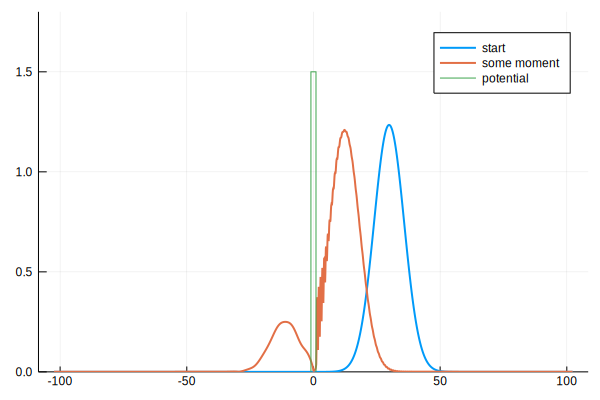

In [14]:
plot(x, 4abs.(U[:,1]), line = 2, lab = "start")
plot!(x, 4abs.(U[:,280]), line = 2, lab = "some moment")
plot!([-1, -1, 1, 1], [0, 1.5, 1.5, 0], yaxis = ((0,1.8), 0:0.5:1.8), lab = "potential" )

И насоздаем кадров для анимации:

In [15]:
cd("C:/Users/User/Desktop/Mycop")

In [16]:
for j in 1:20:size(U, 2) # каждый 20й
    plot(x, 4abs.(U[:,j]), line = 2)
    plot!([-1, -1, 1, 1], [0, 1.5, 1.5, 0], yaxis = ((0,1.8), 0:0.5:1.8), legend = false )
    savefig("plot$j.png") 
end